In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import retinanalysis as ra
import os
import cv2

def load_mp4(str_mp4, b_crop_screencap=True, display_dims=(600,800)):
    cap = cv2.VideoCapture(str_mp4)
    rec_frames = []
    while True:
        ret, rec_frame = cap.read()
        if not ret:
            break
        rec_frames.append(rec_frame)
    cap.release()

    rec_frames = np.array(rec_frames)
    print(f'Loaded {len(rec_frames)} frames from {str_mp4}')
    print(f'Frame shape: {rec_frames.shape}')
    
    if b_crop_screencap:
        n_rows, n_cols = display_dims
        rec_frames = np.array([r_frame[:n_rows, :n_cols, 0] for r_frame in rec_frames])
        print(f'Cropped frame shape: {rec_frames.shape}')
    return rec_frames

Could not connect to DataJoint database: (2003, "Can't connect to MySQL server on '127.0.0.1' ([Errno 111] Connection refused)")


In [2]:
str_regen_files_dir = '/run/user/1001/gvfs/smb-share:server=128.95.10.105,share=data/datajoint_testbed/regen_files'
sb0 = ra.StimBlock(pkl_file=os.path.join(str_regen_files_dir, 'sb0.pkl'))
sb1 = ra.StimBlock(pkl_file=os.path.join(str_regen_files_dir, 'sb1.pkl'))
sb2 = ra.StimBlock(pkl_file=os.path.join(str_regen_files_dir, 'sb2.pkl'))

Initializing StimBlock for None block None from pickle file
StimBlock loaded from /run/user/1001/gvfs/smb-share:server=128.95.10.105,share=data/datajoint_testbed/regen_files/sb0.pkl
Initializing StimBlock for None block None from pickle file
StimBlock loaded from /run/user/1001/gvfs/smb-share:server=128.95.10.105,share=data/datajoint_testbed/regen_files/sb1.pkl
Initializing StimBlock for None block None from pickle file
StimBlock loaded from /run/user/1001/gvfs/smb-share:server=128.95.10.105,share=data/datajoint_testbed/regen_files/sb2.pkl


In [3]:
sb0

StimBlock with properties:
  exp_name: 2025-08-11_dpa_regen
  block_id: 3548
  prep_label: Preparation
  protocol_name: edu.washington.riekelab.rachel.protocols.DovesPerturbationAlpha
  parameter_names of length: 31
  d_epoch_block_params of length 18
  df_epochs for 2 epochs

In [4]:
for i_e in sb0.df_epochs.index:
    sb0.df_epochs.at[i_e, 'epoch_parameters']['micronsPerPixel'] = 3.8

In [5]:
str_pkg_dir = "/home/vyomr/Desktop/gitrepos/rachel-package/"
sb0.regenerate_stimulus(str_pkg_dir=str_pkg_dir, exp_name='20250811')

Regenerating stimulus for epochs: [0, 1] in block: 3548
Using regeneration function: make_doves_perturbation_alpha
Starting matlab engine for stim regen.
Started engine and added pkg to path.
Matlab engine stopped.
Stixel size: 60.0 um, grid size: 30.0 um, steps per stixel: 2, stixel shift: 8 pix
Upsampling noise lines to (84, 420)
Stixel size: 60.0 um, grid size: 30.0 um, steps per stixel: 2, stixel shift: 8 pix
Upsampling noise lines to (84, 420)
Regenerated stimulus with keys: ['noise_lines', 'all_fix_indices', 'd_stim_timing']


In [6]:
str_eb0_rec = '/run/user/1001/gvfs/smb-share:server=128.95.10.105,share=data/datajoint_testbed/regen_files/EB0_2025-08-11 15-52-10.mp4'
eb0_rec = load_mp4(str_eb0_rec, True, (480, 650))

Loaded 1102 frames from /run/user/1001/gvfs/smb-share:server=128.95.10.105,share=data/datajoint_testbed/regen_files/EB0_2025-08-11 15-52-10.mp4
Frame shape: (1102, 1080, 1920, 3)
Cropped frame shape: (1102, 480, 650)


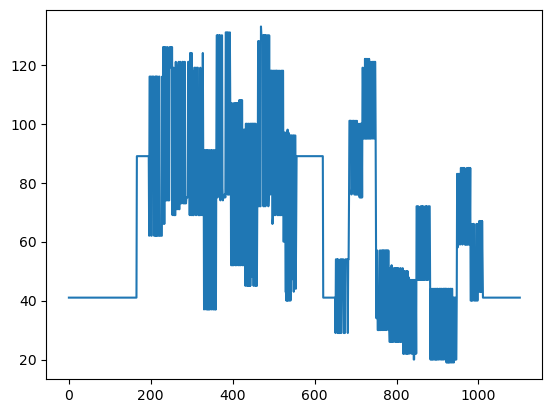

In [7]:
plt.plot(eb0_rec[:,0,0])

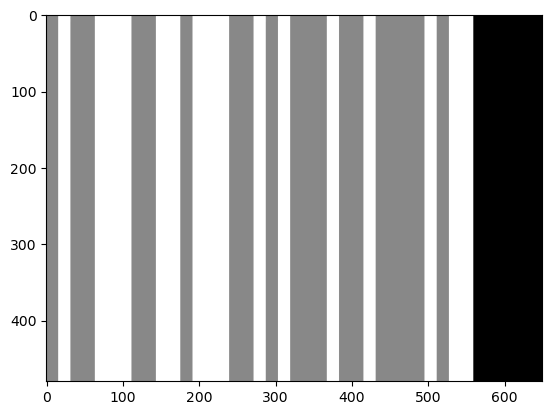

In [8]:
plt.imshow(eb0_rec[196], cmap='gray')

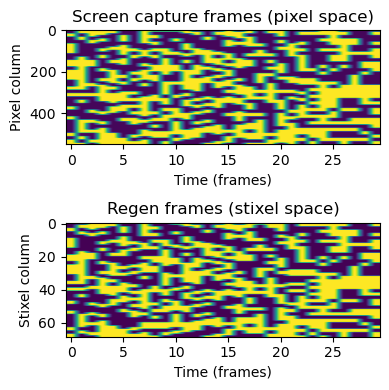

In [12]:
f, axs = plt.subplots(nrows=2, figsize=(4,4))
t_shift = 30
t_max = 30
ax = axs[0]
r_t0 = 196
# ax.plot(eb0_rec[r_t0+t_shift,0,:550], '-o')
ax.imshow(eb0_rec[r_t0:r_t0+t_max,0,:550].T, aspect='auto')
ax.set_title('Screen capture frames (pixel space)')
ax.set_ylabel('Pixel column')
ax.set_xlabel('Time (frames)')
ax = axs[1]
sd_t0 = 30
# ax.plot(sb0.stim_data['noise_lines'][0,:,sd_t0+t_shift], '-o')
ax.imshow(sb0.stim_data['noise_lines'][0,1:70,sd_t0:sd_t0+t_max], aspect='auto')
ax.set_title('Regen frames (stixel space)')
ax.set_ylabel('Stixel column')
ax.set_xlabel('Time (frames)')
plt.tight_layout()